#Include Libraries
Here we will include the necessary libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Load Dataset
in this section we will be reading the dataset

In [2]:
data = pd.read_csv("Data/sample_data.csv")

#Analyzing datatypes

In [3]:
print(data.dtypes)

text     object
label    object
dtype: object


#Descriptive Analysis
Descriptive anaylsis of the dataset will be performed in this section

To get number of rows and columns we will utilize the shape function of numpy library. It shows that the dataseet have 37295 rows and 2 columns.

In [4]:
np.shape(data)

(37295, 2)

Let's count the empty rows

In [5]:
data.isna().sum()

text       0
label    100
dtype: int64

#Deleting rows

Deleting rows with empty label field


In [6]:
data = data.dropna()

In [7]:
np.shape(data)

(37195, 2)

Stripping spaces from text column and deleting rows with empty field

In [11]:
data['text'] = data['text'].str.strip()  # Remove leading and trailing whitespaces
data = data[data['text'] != '']

In [12]:
np.shape(data)

(36895, 2)

Deleting rows with chinese words in them

In [20]:
def contains_chinese(text):
    for char in text:
        if '\u4e00' <= char <= '\u9fff':  # Unicode range for Chinese characters
            return True
    return False

data = data[~data['text'].apply(contains_chinese)]


In [21]:
np.shape(data)

(36595, 2)

#EDA
To anaylyze the unique labels

In [8]:
np.unique(data["label"].astype(str))

array(['ch', 'cnc', 'ct', 'ft', 'mr', 'pkg'], dtype=object)

frequency of each label in dataset

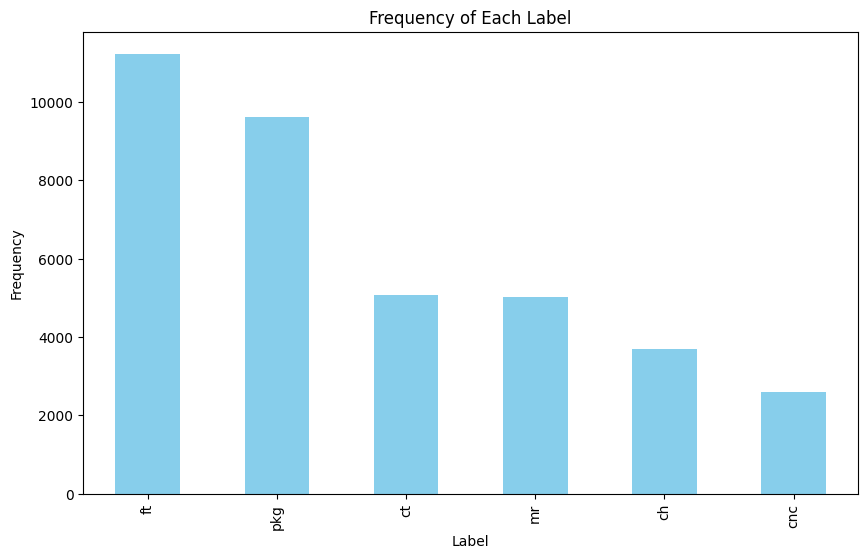

In [9]:
label_counts = data["label"].value_counts()
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Each Label')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()


Making a word cloud to see the most frequent words

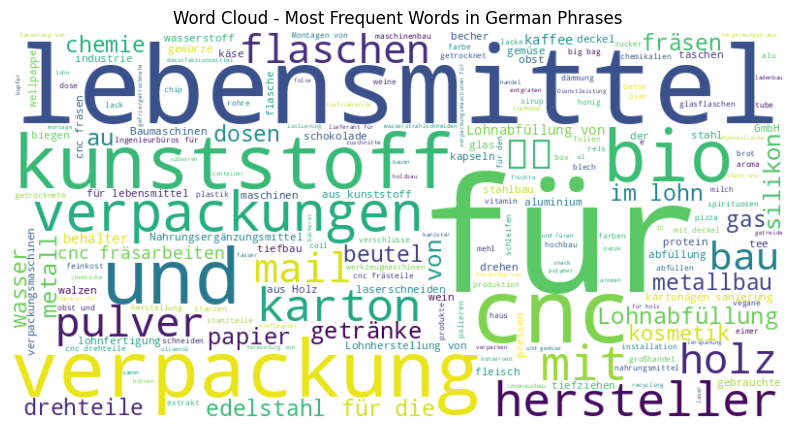

In [17]:
all_phrases = ' '.join(data["text"])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_phrases)


plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Most Frequent Words in German Phrases')
plt.show()

#Saving the cleaned data in a new file

In [23]:
cleaned_file_path = 'Data/cleaned_data.csv'
data.to_csv(cleaned_file_path, index=False)